In [43]:
import pandas as pd
import numpy as np

In [44]:
from IPython.display import display
%matplotlib inline
import seaborn as sns

In [45]:
train = pd.read_csv('all/train-set.csv')
test=pd.read_csv('all/test-set.csv')
display(train.head(n=1),test.head(n=1))

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2611,326,20,120,27,1597,168,214,184,...,0,0,0,0,0,0,0,0,0,6


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,528721,2953,224,9,55,11,1600,206,251,176,...,0,1,0,0,0,0,0,0,0,0


In [46]:
train['Ele_minus_VDtHyd'] = train.Elevation - train.Vertical_Distance_To_Hydrology
train['Ele_plus_VDtHyd'] = train.Elevation + train.Vertical_Distance_To_Hydrology
train['Distanse_to_Hydrolody'] = (train['Horizontal_Distance_To_Hydrology'] ** 2 + train['Vertical_Distance_To_Hydrology'] ** 2) ** 0.5
train['Hydro_plus_Fire'] = train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Fire_Points']
train['Hydro_minus_Fire'] = train['Horizontal_Distance_To_Hydrology'] - train['Horizontal_Distance_To_Fire_Points']
train['Hydro_plus_Road'] = train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Roadways']
train['Hydro_minus_Road'] = train['Horizontal_Distance_To_Hydrology'] - train['Horizontal_Distance_To_Roadways']
train['Fire_plus_Road'] = train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Roadways']
train['Fire_minus_Road'] = train['Horizontal_Distance_To_Fire_Points'] - train['Horizontal_Distance_To_Roadways']
train['Soil'] = 0
for i in range(1, 41):
    train['Soil'] = train['Soil'] + i * train['Soil_Type' + str(i)]
train['Wilderness_Area'] = 0
for i in range(1, 5):
    train['Wilderness_Area'] = train['Wilderness_Area'] + i * train['Wilderness_Area' + str(i)]
for i in range(1, 41):
    train = train.drop(['Soil_Type' + str(i)], axis=1)
for i in range(1, 5):
    train = train.drop(['Wilderness_Area' + str(i)], axis=1)
train.head(10)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528720 entries, 0 to 528719
Data columns (total 23 columns):
Id                                    528720 non-null int64
Elevation                             528720 non-null int64
Aspect                                528720 non-null int64
Slope                                 528720 non-null int64
Horizontal_Distance_To_Hydrology      528720 non-null int64
Vertical_Distance_To_Hydrology        528720 non-null int64
Horizontal_Distance_To_Roadways       528720 non-null int64
Hillshade_9am                         528720 non-null int64
Hillshade_Noon                        528720 non-null int64
Hillshade_3pm                         528720 non-null int64
Horizontal_Distance_To_Fire_Points    528720 non-null int64
Cover_Type                            528720 non-null int64
Ele_minus_VDtHyd                      528720 non-null int64
Ele_plus_VDtHyd                       528720 non-null int64
Distanse_to_Hydrolody                 528720 non-

In [4]:
# tem = train.values
# print(tem[:10,-45:])

[[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 6]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 2]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 2]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 7]]


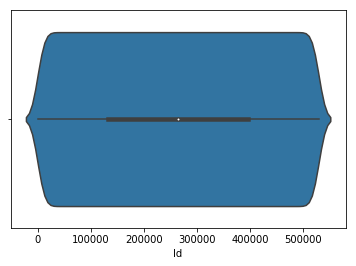

In [18]:
# sns.violinplot(x="Id", hue="Cover_Type", data=train)

In [6]:
# train['Elevation']=train['Elevation'].map(lambda x: 'x' if x<3100 and x>2900 else '7' if x<3200 and x>3100 else '6')

In [7]:
# train = train.drop(['Aspect'], axis=1)
# train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528720 entries, 0 to 528719
Data columns (total 56 columns):
Id                                    528720 non-null int64
Elevation                             528720 non-null int64
Aspect                                528720 non-null int64
Slope                                 528720 non-null int64
Horizontal_Distance_To_Hydrology      528720 non-null int64
Vertical_Distance_To_Hydrology        528720 non-null int64
Horizontal_Distance_To_Roadways       528720 non-null int64
Hillshade_9am                         528720 non-null int64
Hillshade_Noon                        528720 non-null int64
Hillshade_3pm                         528720 non-null int64
Horizontal_Distance_To_Fire_Points    528720 non-null int64
Wilderness_Area1                      528720 non-null int64
Wilderness_Area2                      528720 non-null int64
Wilderness_Area3                      528720 non-null int64
Wilderness_Area4                      528720 non-

In [8]:
# train_data = train.values
# soil_data = train_data[:,-41:-1]
# wild_data = train_data[:,11:14]
# print(soil_data[:10,:])
# print(wild_data[:10,:])
# # for i in range(0,len)
# for k in range(0,train_data.shape[0]):
#     soil_data[k,:] = np.argmax(soil_data[k,:])+1
#     wild_data[k,:] = np.argmax(wild_data[k,:])+1
# # soil_data = soil_data[:,0]
# # print(soil_data.shape[0])
# temp_data = np.column_stack((train_data[:,:11],wild_data[:,0]))
# temp_data = np.column_stack((temp_data[:,:],soil_data[:,0]))
# train_data = np.column_stack((temp_data[:,:],train_data[:,-1]))
# print(train_data[0:10,:])

[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0]]
[[0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]]
[[   1 2611  326   20  120   27 1597  168  214  184 2913  

In [17]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators = 300,oob_score=True, random_state=30)
# # from sklearn.neighbors import KNeighborsClassifier
# # model = KNeighborsClassifier(n_neighbors = 10)
# model = model.fit(train_data[0:-1000,1:-1],train_data[0:-1000,-1])
# test_data = train_data[-1000:,1:-1]
# output = model.predict(test_data)
# output = model.predict(test_data)
# standard = train_data[-1000:,-1]
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(standard,output)
# print(accuracy)

0.947


In [49]:
train_x = train.drop(['Cover_Type'], axis=1)
train_y = train['Cover_Type']

In [50]:
train_x.info()
print(train_y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528720 entries, 0 to 528719
Data columns (total 22 columns):
Id                                    528720 non-null int64
Elevation                             528720 non-null int64
Aspect                                528720 non-null int64
Slope                                 528720 non-null int64
Horizontal_Distance_To_Hydrology      528720 non-null int64
Vertical_Distance_To_Hydrology        528720 non-null int64
Horizontal_Distance_To_Roadways       528720 non-null int64
Hillshade_9am                         528720 non-null int64
Hillshade_Noon                        528720 non-null int64
Hillshade_3pm                         528720 non-null int64
Horizontal_Distance_To_Fire_Points    528720 non-null int64
Ele_minus_VDtHyd                      528720 non-null int64
Ele_plus_VDtHyd                       528720 non-null int64
Distanse_to_Hydrolody                 528720 non-null float64
Hydro_plus_Fire                       528720 no

In [51]:
train_x_data = train_x.values
train_y_data = train_y.values
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 500,oob_score=True, random_state=30)
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors = 10)
model = model.fit(train_x_data[0:-1000,:],train_y_data[0:-1000])

In [52]:
test_x_data = train_x_data[-1000:,:]
test_y_data = train_y_data[-1000:]
output = model.predict(test_x_data)
# output = model.predict(test_data)
# standard = train_data[-1000:,-1]
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y_data,output)
print(accuracy)

0.949
